In [1]:
import pandas as pd
import numpy as np
import seaborn as sns                       #visualisation
import matplotlib
import matplotlib.pyplot as plt             #visualisation
import os
from sklearn import preprocessing 

%matplotlib inline     
sns.set(color_codes=True)

In [2]:
# thomas_path = "C:\\Users\\User\\Desktop\\Data Airbnb"
thomas_path = "/home/user2/CLEAN/inside-airbnb-vacancies/Data Airbnb"

listings = pd.read_csv(os.path.join(thomas_path, "listings.csv"))
sum_listings = pd.read_csv(os.path.join(thomas_path, "listings summary.csv"))
sum_nbhd = pd.read_csv(os.path.join(thomas_path, "neighbourhoods summary.csv"))
sum_rev = pd.read_csv(os.path.join(thomas_path, "reviews summary.csv"))
revs = pd.read_csv(os.path.join(thomas_path, "reviews.csv"))


minimum_nights              minimum number of night stay for the listing (calendar rules may be different)
minimum_minimum_nights      the smallest minimum_night value from the calender (looking 365 nights in the future)
maximum_minimum_nights      the largest minimum_night value from the calender (looking 365 nights in the future)
minimum_nights_avg_ntm      the average minimum_night value from the calender (looking 365 nights in the future)

### RQ2: How does the minimum number of nights that customers must book affect the likelihood of a property being vacant?

In [3]:
print(listings.columns)

Index(['id', 'listing_url', 'scrape_id', 'last_scraped', 'source', 'name',
       'description', 'neighborhood_overview', 'picture_url', 'host_id',
       'host_url', 'host_name', 'host_since', 'host_location', 'host_about',
       'host_response_time', 'host_response_rate', 'host_acceptance_rate',
       'host_is_superhost', 'host_thumbnail_url', 'host_picture_url',
       'host_neighbourhood', 'host_listings_count',
       'host_total_listings_count', 'host_verifications',
       'host_has_profile_pic', 'host_identity_verified', 'neighbourhood',
       'neighbourhood_cleansed', 'neighbourhood_group_cleansed', 'latitude',
       'longitude', 'property_type', 'room_type', 'accommodates', 'bathrooms',
       'bathrooms_text', 'bedrooms', 'beds', 'amenities', 'price',
       'minimum_nights', 'maximum_nights', 'minimum_minimum_nights',
       'maximum_minimum_nights', 'minimum_maximum_nights',
       'maximum_maximum_nights', 'minimum_nights_avg_ntm',
       'maximum_nights_avg_ntm', 'ca

In [4]:
sum_listings.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm,license
0,34935,Rental unit in Greater London · ★4.55 · 1 bedr...,133271,Hendryks,NaN,Tower Hamlets,51.52367,-0.068886,Entire home/apt,151.0,2,122,2023-10-02,0.75,10,7,3,NaN
1,198258,Rental unit in Barking · ★4.74 · 1 bedroom · 1...,967537,Ryan,NaN,Barking and Dagenham,51.53430,0.081780,Private room,67.0,2,41,2023-03-16,0.27,1,363,1,NaN
2,228389,Home in Croydon · 1 bedroom · 1 bed · 1.5 shar...,1023326,Jocelyn,NaN,Croydon,51.36646,-0.121180,Private room,50.0,2,0,NaN,NaN,3,341,0,NaN
3,229684,Home in Lewisham · ★4.41 · 1 bedroom · 1 bed ·...,448365,Roland,NaN,Lewisham,51.48793,-0.042040,Private room,30.0,1,22,2016-11-06,0.20,3,0,0,NaN
4,230839,Rental unit in Hackney · ★4.50 · 1 bedroom · 1...,671259,Kiki,NaN,Hackney,51.53680,-0.077530,Entire home/apt,NaN,7,4,2012-08-16,0.03,1,0,0,NaN


In [5]:
sum_nbhd.head()

,neighbourhood_group,neighbourhood
0,NaN,Barking and Dagenham
1,NaN,Barnet
2,NaN,Bexley
3,NaN,Brent
4,NaN,Bromley


In [6]:
sum_rev.head()

,listing_id,date
0,13913,2010-08-18
1,13913,2011-07-11
2,13913,2011-09-13
3,13913,2011-10-03
4,13913,2011-10-09


In [7]:
revs.head()

,listing_id,id,date,reviewer_id,reviewer_name,comments
0,13913,80770,2010-08-18,177109,Michael,My girlfriend and I hadn't known Alina before ...
1,13913,367568,2011-07-11,19835707,Mathias,Alina was a really good host. The flat is clea...
2,13913,529579,2011-09-13,1110304,Kristin,Alina is an amazing host. She made me feel rig...
3,13913,595481,2011-10-03,1216358,Camilla,"Alina's place is so nice, the room is big and ..."
4,13913,612947,2011-10-09,490840,Jorik,"Nice location in Islington area, good for shor..."


In [8]:
listings['minimum_minimum_nights']

0         2.0
1         2.0
2         4.0
3        14.0
4         1.0
         ... 
91773     7.0
91774     3.0
91775     1.0
91776     1.0
91777     1.0
Name: minimum_minimum_nights, Length: 91778, dtype: float64

In [9]:
listings['minimum_nights']

0         2
1         2
2         4
3        14
4         1
         ..
91773     7
91774     3
91775     1
91776     1
91777     3
Name: minimum_nights, Length: 91778, dtype: int64

In [10]:
(listings['minimum_minimum_nights']-listings['minimum_nights']).describe()

count    91777.000000
mean        -0.361627
std          9.631561
min       -997.000000
25%          0.000000
50%          0.000000
75%          0.000000
max        364.000000
dtype: float64

In [11]:
columns = ['minimum_nights', 'maximum_nights', 'minimum_minimum_nights',
       'maximum_minimum_nights', 'minimum_maximum_nights',
       'maximum_maximum_nights', 'minimum_nights_avg_ntm',
       'maximum_nights_avg_ntm', 'has_availability',
       'availability_30', 'availability_60', 'availability_90',
       'availability_365']

array([[<AxesSubplot:title={'center':'minimum_nights'}>]], dtype=object)

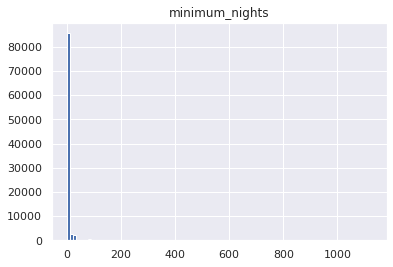

In [12]:
pd.DataFrame.hist(data = sum_listings, column='minimum_nights', bins=100)

In [13]:
sum_listings[sum_listings['minimum_nights']>21].count()

id                                3521
name                              3521
host_id                           3521
host_name                         3521
neighbourhood_group                  0
neighbourhood                     3521
latitude                          3521
longitude                         3521
room_type                         3521
price                             3381
minimum_nights                    3521
number_of_reviews                 3521
last_review                       1970
reviews_per_month                 1970
calculated_host_listings_count    3521
availability_365                  3521
number_of_reviews_ltm             3521
license                              0
dtype: int64

In [14]:
min_nights = listings['minimum_nights']
avail_356 = listings['availability_365']
avail_90 = listings['availability_90']
avail_60 = listings['availability_60']
avail_30 = listings['availability_30']

corr_365 = avail_356.corr(min_nights)
corr_90 = avail_90.corr(min_nights)
corr_60 = avail_60.corr(min_nights)
corr_30 = avail_30.corr(min_nights)

print(corr_365)
print(corr_90)
print(corr_60)
print(corr_30)

0.04385314863662187
0.03566644735993
0.037195711037940074
0.04552554648042026


does not appear to be a substantial correlation between number of minimum nights and availability


In [15]:
superhost_listings = listings[listings['host_is_superhost'] == 't']
superhost_listings.describe()

,id,scrape_id,description,host_id,host_listings_count,host_total_listings_count,neighbourhood_group_cleansed,latitude,longitude,accommodates,...,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,license,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
count,1.512000e+04,1.512000e+04,0.0,1.512000e+04,15120.000000,15120.000000,0.0,15120.000000,15120.000000,15120.000000,...,13909.000000,13911.000000,13910.000000,13910.000000,0.0,15120.000000,15120.000000,15120.000000,15120.000000,13901.000000
mean,4.158278e+17,2.023121e+13,NaN,1.482204e+08,8.629233,17.027315,NaN,51.507531,-0.132041,3.177183,...,4.900996,4.928956,4.811306,4.766196,NaN,7.486640,5.887302,1.577844,0.020503,1.576071
std,4.228817e+17,0.000000e+00,NaN,1.682271e+08,19.181167,55.193207,NaN,0.049415,0.099777,2.035604,...,0.178306,0.159462,0.231818,0.250294,NaN,16.849248,16.256782,4.092993,0.150323,1.575912
min,1.740200e+04,2.023121e+13,NaN,4.775000e+03,1.000000,1.000000,NaN,51.295937,-0.497800,1.000000,...,1.000000,1.000000,1.000000,1.000000,NaN,1.000000,0.000000,0.000000,0.000000,0.010000
25%,2.764876e+07,2.023121e+13,NaN,1.742254e+07,1.000000,2.000000,NaN,51.480947,-0.192658,2.000000,...,4.880000,4.910000,4.730000,4.690000,NaN,1.000000,0.000000,0.000000,0.000000,0.540000
50%,5.510563e+17,2.023121e+13,NaN,6.384447e+07,3.000000,4.000000,NaN,51.510990,-0.131123,2.000000,...,4.950000,4.980000,4.860000,4.810000,NaN,2.000000,1.000000,1.000000,0.000000,1.070000
75%,8.439488e+17,2.023121e+13,NaN,2.347141e+08,6.000000,9.000000,NaN,51.537373,-0.072413,4.000000,...,5.000000,5.000000,4.970000,4.910000,NaN,6.000000,3.000000,2.000000,0.000000,2.030000
max,1.042133e+18,2.023121e+13,NaN,5.377356e+08,149.000000,510.000000,NaN,51.681642,0.288570,16.000000,...,5.000000,5.000000,5.330000,5.000000,NaN,131.000000,127.000000,47.000000,3.000000,19.700000


# Building A regression model

In [16]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Data preprocessing
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

# Neural Net modules
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.callbacks import EarlyStopping

import os
os.environ["CUDA_VISIBLE_DEVICES"] = "0"  # Set to use GPU 0
libDevicePath = '--xla_gpu_cuda_data_dir=/usr/lib/cuda/nvvm'
os.environ['XLA_FLAGS'] = libDevicePath

2024-04-20 09:12:20.337470: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-04-20 09:12:20.337500: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-04-20 09:12:20.338431: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-04-20 09:12:20.342652: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-04-20 09:12:20.873432: W tensorflow/compiler/tf2

In [17]:
superhost_listings_filter = superhost_listings.loc[:, columns]
superhost_listings_filter.head()

y30 = superhost_listings_filter['availability_30']
y60 = superhost_listings_filter['availability_60']
y90 = superhost_listings_filter['availability_90']
y365 = superhost_listings_filter['availability_365']
X = superhost_listings_filter.drop(['availability_90', 'availability_365', 'has_availability'], axis=1)

X = np.array(X)
y30 = np.array(y30)
y60 = np.array(y60)
y90 = np.array(y90)
y365 = np.array(y365)

X_train, X_test, y_train, y_test = train_test_split(X, y365,
                                                    test_size=0.2,
                                                    random_state=123)

print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

# use minMax scaler
min_max_scaler = MinMaxScaler()
X_train = min_max_scaler.fit_transform(X_train)
X_test = min_max_scaler.transform(X_test)


(12096, 10) (3024, 10) (12096,) (3024,)


In [18]:
model = Sequential()
model.add(Dense(1000, input_shape=(X_train.shape[1],), activation='relu')) # (features,)
model.add(Dropout(0.5)) # specify a percentage between 0 and 0.5, or larger
model.add(Dense(500, activation='relu'))
model.add(Dropout(0.5)) # specify a percentage between 0 and 0.5, or larger
model.add(Dense(250, activation='relu'))
model.add(Dropout(0.5)) # specify a percentage between 0 and 0.5, or larger
model.add(Dense(1, activation='linear')) # output node
model.summary() # see what your model looks like

# compile the model
model.compile(optimizer='rmsprop', loss='mse', metrics=['mae'])

# early stopping callback
es = EarlyStopping(monitor='val_loss',
                   mode='min',
                   patience=50,
                   restore_best_weights = True)

# fit the model!
# attach it to a new variable called 'history' in case
# to look at the learning curves
history = model.fit(X_train, y_train,
                    validation_data = (X_test, y_test),
                    callbacks=[es],
                    epochs=5000,
                    batch_size=50,
                    verbose=1)

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 1000)              11000     
                                                                 
 dropout (Dropout)           (None, 1000)              0         
                                                                 
 dense_1 (Dense)             (None, 500)               500500    
                                                                 
 dropout_1 (Dropout)         (None, 500)               0         
                                                                 
 dense_2 (Dense)             (None, 250)               125250    
                                                                 
 dropout_2 (Dropout)         (None, 250)               0         
                                                                 
 dense_3 (Dense)             (None, 1)                 2

2024-04-20 09:12:21.493065: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:901] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2024-04-20 09:12:21.521832: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:901] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2024-04-20 09:12:21.522080: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:901] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-

242/242 [==============================] - 2s 4ms/step - loss: 11235.7725 - mae: 87.5213 - val_loss: 9474.6953 - val_mae: 82.1301
Epoch 2/5000
242/242 [==============================] - 1s 3ms/step - loss: 9836.9619 - mae: 81.9098 - val_loss: 9626.4453 - val_mae: 79.7551
Epoch 3/5000
242/242 [==============================] - 1s 3ms/step - loss: 9741.7793 - mae: 80.9201 - val_loss: 9258.2881 - val_mae: 81.1323
Epoch 4/5000
242/242 [==============================] - 1s 3ms/step - loss: 9743.2061 - mae: 80.7362 - val_loss: 9176.6807 - val_mae: 80.2026
Epoch 5/5000
242/242 [==============================] - 1s 3ms/step - loss: 9662.5820 - mae: 80.0122 - val_loss: 9430.4609 - val_mae: 81.7106
Epoch 6/5000
242/242 [==============================] - 1s 3ms/step - loss: 9577.2510 - mae: 79.5000 - val_loss: 9342.7119 - val_mae: 79.0448
Epoch 7/5000
242/242 [==============================] - 1s 3ms/step - loss: 9633.1572 - mae: 79.7229 - val_loss: 9325.9746 - val_mae: 77.8753
Epoch 8/5000
242/2

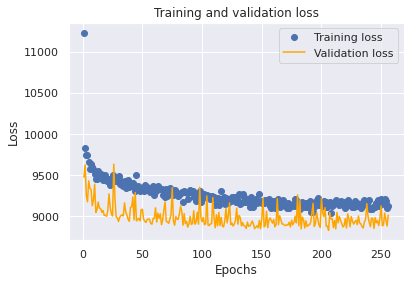

In [19]:
history_dict = history.history
loss_values = history_dict['loss'] # you can change this
val_loss_values = history_dict['val_loss'] # you can also change this
epochs = range(1, len(loss_values) + 1) # range of X (no. of epochs)
plt.plot(epochs, loss_values, 'bo', label='Training loss')
plt.plot(epochs, val_loss_values, 'orange', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

95/95 [==============================] - 0s 688us/step


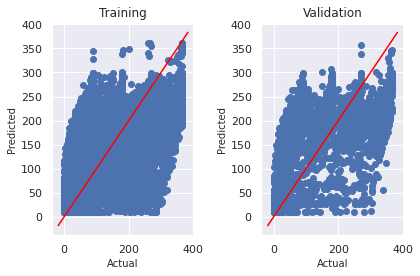

In [20]:
# scatterplot of actual vs. pred
# specify the dimensions 
fig, axes = plt.subplots(1,2) # 1 row, 2 columns

# this makes the individual subplots
# Training Results
axes[0].scatter(x=y_train, y=model.predict(X_train)) #first row, first entry (left top)
axes[0].set_xlabel("Actual", fontsize=10)
axes[0].set_ylabel("Predicted",  fontsize=10)
axes[0].set_title("Training")
# add 45 deg line
x = np.linspace(*axes[0].get_xlim())
axes[0].plot(x, x, color='red')
# Validation Results
axes[1].scatter(x=y_test, y=model.predict(X_test)) # first row, second entry (right top)
axes[1].set_xlabel("Actual", fontsize=10)
axes[1].set_ylabel("Predicted",  fontsize=10)
axes[1].set_title("Validation")
# add 45 deg line
x = np.linspace(*axes[1].get_xlim())
axes[1].plot(x, x, color='red')

# tight layout
fig.tight_layout()

# show the plot
plt.show()

In [21]:
pred = model.predict(X_test)
pred

trainpreds = model.predict(X_train)

from sklearn.metrics import mean_absolute_error
print(mean_absolute_error(y_train, trainpreds)) # train
print(mean_absolute_error(y_test, pred)) # test

378/378 [==============================] - 0s 597us/step
75.83858999247273
76.81765413189692


In [22]:
X_train, X_test, y_train, y_test = train_test_split(X, y90,
                                                    test_size=0.2,
                                                    random_state=123)

print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

# use minMax scaler
min_max_scaler = MinMaxScaler()
X_train = min_max_scaler.fit_transform(X_train)
X_test = min_max_scaler.transform(X_test)


(12096, 10) (3024, 10) (12096,) (3024,)


In [23]:
model = Sequential()
model.add(Dense(1000, input_shape=(X_train.shape[1],), activation='relu')) # (features,)
model.add(Dropout(0.5)) # specify a percentage between 0 and 0.5, or larger
model.add(Dense(500, activation='relu'))
model.add(Dropout(0.5)) # specify a percentage between 0 and 0.5, or larger
model.add(Dense(250, activation='relu'))
model.add(Dropout(0.5)) # specify a percentage between 0 and 0.5, or larger
model.add(Dense(1, activation='linear')) # output node
model.summary() # see what your model looks like

# compile the model
model.compile(optimizer='rmsprop', loss='mse', metrics=['mae'])

# early stopping callback
es = EarlyStopping(monitor='val_loss',
                   mode='min',
                   patience=50,
                   restore_best_weights = True)

# fit the model!
# attach it to a new variable called 'history' in case
# to look at the learning curves
history = model.fit(X_train, y_train,
                    validation_data = (X_test, y_test),
                    callbacks=[es],
                    epochs=5000,
                    batch_size=50,
                    verbose=1)

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_4 (Dense)             (None, 1000)              11000     
                                                                 
 dropout_3 (Dropout)         (None, 1000)              0         
                                                                 
 dense_5 (Dense)             (None, 500)               500500    
                                                                 
 dropout_4 (Dropout)         (None, 500)               0         
                                                                 
 dense_6 (Dense)             (None, 250)               125250    
                                                                 
 dropout_5 (Dropout)         (None, 250)               0         
                                                                 
 dense_7 (Dense)             (None, 1)                

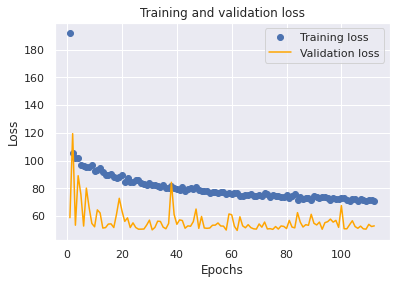

In [24]:
history_dict = history.history
loss_values = history_dict['loss'] # you can change this
val_loss_values = history_dict['val_loss'] # you can also change this
epochs = range(1, len(loss_values) + 1) # range of X (no. of epochs)
plt.plot(epochs, loss_values, 'bo', label='Training loss')
plt.plot(epochs, val_loss_values, 'orange', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

95/95 [==============================] - 0s 609us/step


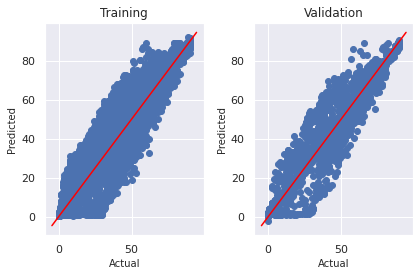

In [25]:
# scatterplot of actual vs. pred
# specify the dimensions 
fig, axes = plt.subplots(1,2) # 1 row, 2 columns

# this makes the individual subplots
# Training Results
axes[0].scatter(x=y_train, y=model.predict(X_train)) #first row, first entry (left top)
axes[0].set_xlabel("Actual", fontsize=10)
axes[0].set_ylabel("Predicted",  fontsize=10)
axes[0].set_title("Training")
# add 45 deg line
x = np.linspace(*axes[0].get_xlim())
axes[0].plot(x, x, color='red')
# Validation Results
axes[1].scatter(x=y_test, y=model.predict(X_test)) # first row, second entry (right top)
axes[1].set_xlabel("Actual", fontsize=10)
axes[1].set_ylabel("Predicted",  fontsize=10)
axes[1].set_title("Validation")
# add 45 deg line
x = np.linspace(*axes[1].get_xlim())
axes[1].plot(x, x, color='red')

# tight layout
fig.tight_layout()

# show the plot
plt.show()

In [26]:
pred = model.predict(X_test)
pred

trainpreds = model.predict(X_train)

from sklearn.metrics import mean_absolute_error
print(mean_absolute_error(y_train, trainpreds)) # train
print(mean_absolute_error(y_test, pred)) # test

378/378 [==============================] - 0s 604us/step
4.120759705968556
4.308625590075891


In [46]:
listings_filter = listings.loc[:, columns]
listings_filter.head()
listings_filter = listings_filter[listings_filter['maximum_nights'] < 1000]
listings_filter = listings_filter[listings_filter['minimum_maximum_nights'] < 1000]

y30 = listings_filter['availability_30']
y60 = listings_filter['availability_60']
y90 = listings_filter['availability_90']
y365 = listings_filter['availability_365']
X = listings_filter.drop(['availability_90', 'availability_365', 'has_availability'], axis=1)

X = np.array(X)
y30 = np.array(y30)
y60 = np.array(y60)
y90 = np.array(y90)
y365 = np.array(y365)

In [48]:
X_train, X_test, y_train, y_test = train_test_split(X, y90,
                                                    test_size=0.2,
                                                    random_state=123)

print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

# use minMax scaler
min_max_scaler = MinMaxScaler()
X_train = min_max_scaler.fit_transform(X_train)
X_test = min_max_scaler.transform(X_test)

model = Sequential()
model.add(Dense(1000, input_shape=(X_train.shape[1],), activation='relu')) # (features,)
model.add(Dropout(0.5)) # specify a percentage between 0 and 0.5, or larger
model.add(Dense(500, activation='relu'))
model.add(Dropout(0.5)) # specify a percentage between 0 and 0.5, or larger
model.add(Dense(250, activation='relu'))
model.add(Dropout(0.5)) # specify a percentage between 0 and 0.5, or larger
model.add(Dense(1, activation='linear')) # output node
model.summary() # see what your model looks like

# compile the model
model.compile(optimizer='adam', loss='mse', metrics=['mae'])

# early stopping callback
es = EarlyStopping(monitor='val_loss',
                   mode='min',
                   patience=50,
                   restore_best_weights = True)

# fit the model!
# attach it to a new variable called 'history' in case
# to look at the learning curves
history = model.fit(X_train, y_train,
                    validation_data = (X_test, y_test),
                    callbacks=[es],
                    epochs=5000,
                    batch_size=50,
                    verbose=1)


ValueError: Found input variables with inconsistent numbers of samples: [49298, 91778]

In [ ]:
history_dict = history.history
loss_values = history_dict['loss'] # you can change this
val_loss_values = history_dict['val_loss'] # you can also change this
epochs = range(1, len(loss_values) + 1) # range of X (no. of epochs)
plt.plot(epochs, loss_values, 'bo', label='Training loss')
plt.plot(epochs, val_loss_values, 'orange', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [ ]:
# scatterplot of actual vs. pred
# specify the dimensions 
fig, axes = plt.subplots(1,2) # 1 row, 2 columns

# this makes the individual subplots
# Training Results
axes[0].scatter(x=y_train, y=model.predict(X_train)) #first row, first entry (left top)
axes[0].set_xlabel("Actual", fontsize=10)
axes[0].set_ylabel("Predicted",  fontsize=10)
axes[0].set_title("Training")
# add 45 deg line
x = np.linspace(*axes[0].get_xlim())
axes[0].plot(x, x, color='red')
# Validation Results
axes[1].scatter(x=y_test, y=model.predict(X_test)) # first row, second entry (right top)
axes[1].set_xlabel("Actual", fontsize=10)
axes[1].set_ylabel("Predicted",  fontsize=10)
axes[1].set_title("Validation")
# add 45 deg line
x = np.linspace(*axes[1].get_xlim())
axes[1].plot(x, x, color='red')

# tight layout
fig.tight_layout()

# show the plot
plt.show()

In [ ]:
pred = model.predict(X_test)
pred

trainpreds = model.predict(X_train)

from sklearn.metrics import mean_absolute_error
print(mean_absolute_error(y_train, trainpreds)) # train
print(mean_absolute_error(y_test, pred)) # test